### Image Pipeline

1. Take a picture of your face or have a friend do it
2. Import the image into Jupyter Notebook
3. Anaylze the image (shape, size, etc)
4. Create a Histogram of the whole image, RGB
5. Modify your image with brightness and contrast 
6. Mask out your face
7. Use the mask to create a HSV histogram
8. Analyze the histogram for skintone ranges
9. Use the HSV ranges to create a mask
10. Apply the mask to the image and segment out your skin/face

In [75]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#import image
img = cv2.imread("Graphics/face.jpg", 1)

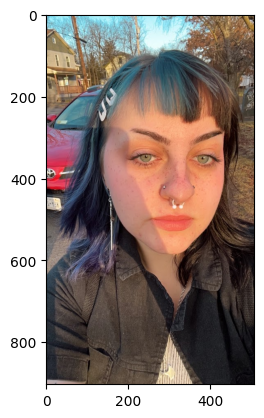

In [85]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

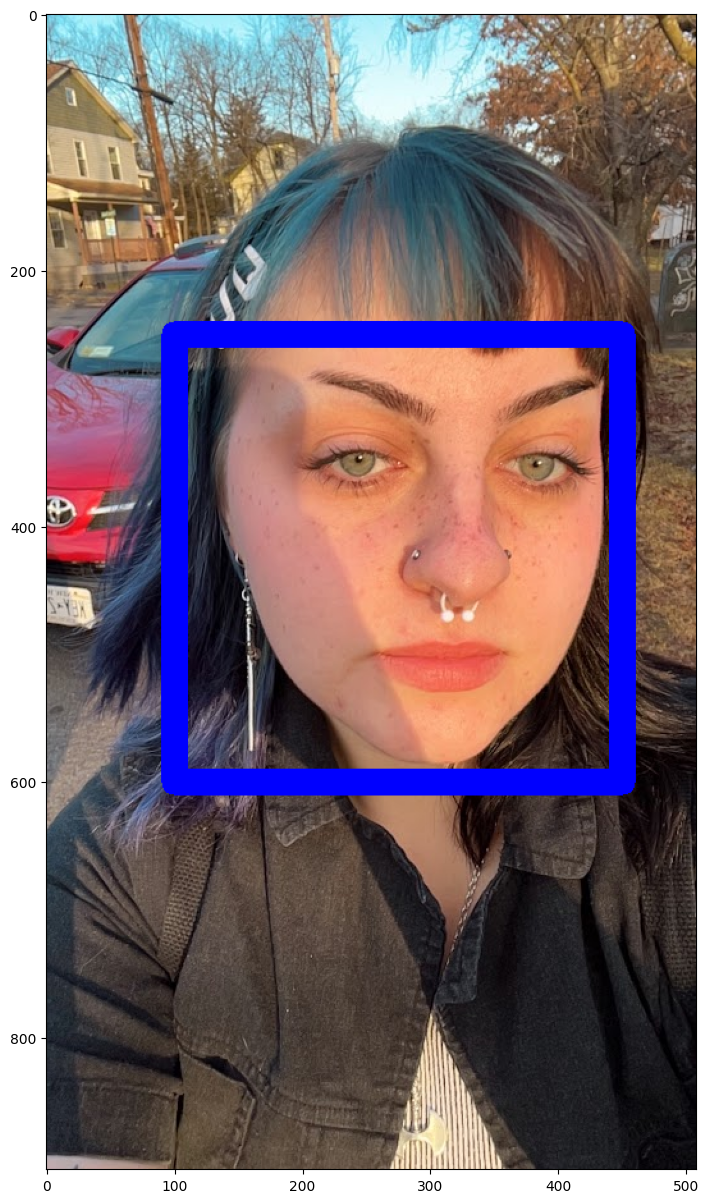

In [86]:
# Convert back to BGR
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Top left of rectangle.
top_left = (100, 250)

# Bottom right of rectangle.
bottom_right = (450, 600)

# Color
rect_color = (255,0,0)

# Thickness of line
thickness = 20

# Apply rectangle.
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Convert back to RGB
img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)

# Make image larger on plot.
fig = plt.figure(figsize=(15,15))

# Plot image.
plt.imshow(img_rect)


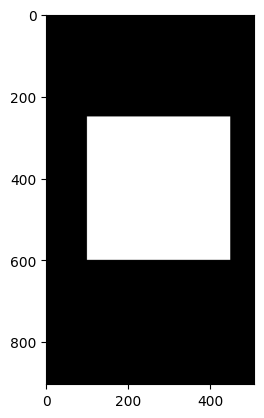

In [87]:
#create a mask
#top_left = (100, 250)
#bottom_right = (450, 600)

#create a black mask
mask = np.zeros(img.shape[:2], np.uint8)

#add the white portion of the mask
mask[250:600, 100:450] = 255

#plot mask
plt.imshow(mask, cmap="gray")

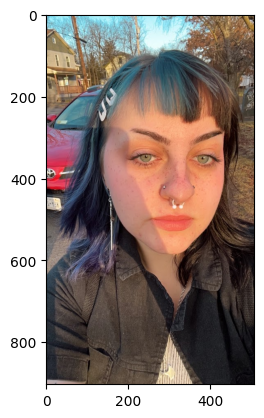

In [92]:
#reimport image
img = cv2.imread("Graphics/face.jpg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [93]:
#convert to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

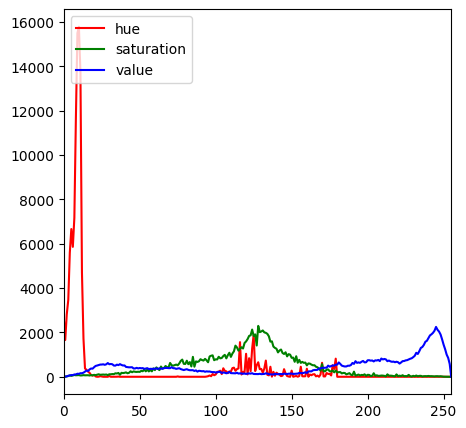

In [94]:
#size of the histogram
fig = plt.figure(figsize=(5,5))

#plot the hue.
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

#plot the saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

#plot the value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show()

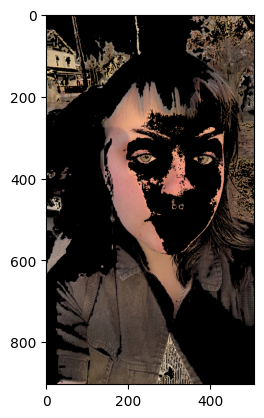

In [95]:
#min and max HSV
min_HSV = np.array([0,25,0], np.uint8)
max_HSV = np.array([20,125,245], np.uint8)

#cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

#bitwise and mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

#convert back to HSV
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

#show image
plt.imshow(skinHSV)